## Download Dependencies

In [1]:
#!pip install dtaidistance

## Dynamic Time Warping (DTW) Distance Measure

[(0, 0), (1, 0), (2, 1), (3, 2), (3, 3), (4, 4), (5, 5), (6, 5), (7, 6), (8, 7), (9, 8), (10, 9), (11, 10), (11, 11), (12, 12)]


(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feea91245c0>,
       dtype=object))

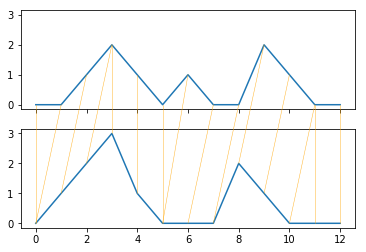

In [21]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])
path = dtw.warping_path(s1, s2)
print(path)
dtwvis.plot_warping(s1, s2, path)

In [6]:
distance = dtw.distance(s1, s2)
print(distance)

1.4142135623730951


In [7]:
# The fastest version (30-300 times) uses c directly but requires an array as input (with the double type):
from dtaidistance import dtw
import array
s1 = array.array('d',[0, 0, 1, 2, 1, 0, 1, 0, 0])
s2 = array.array('d',[0, 1, 2, 0, 0, 0, 0, 0, 0])
d = dtw.distance_fast(s1, s2)

The compiled dtaidistance C library is not available.
See the documentation for alternative installation options.


(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7feea8b15710>])

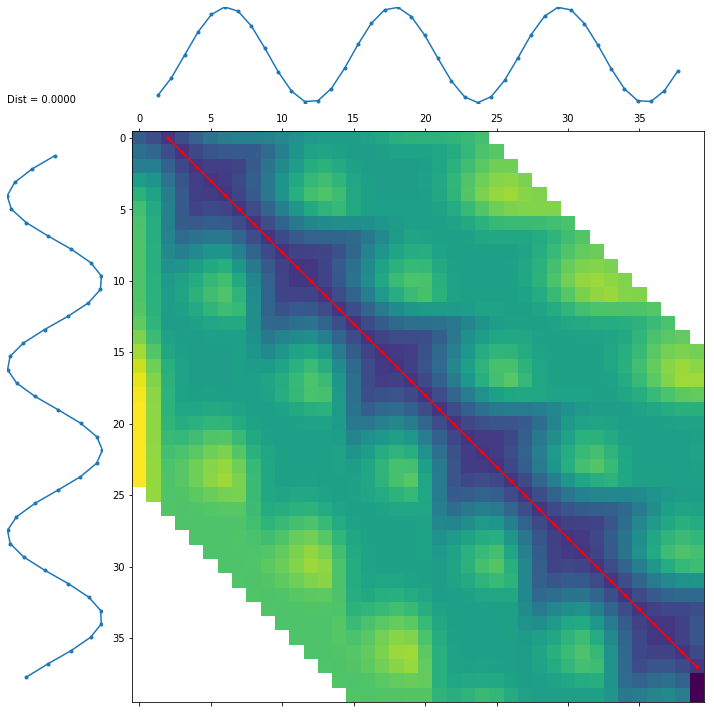

In [24]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
x = np.arange(0, 20, .5)
s1 = np.sin(x)
s2 = np.sin(x - 1)
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

3.6349248053859955


(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7feea89b4b00>])

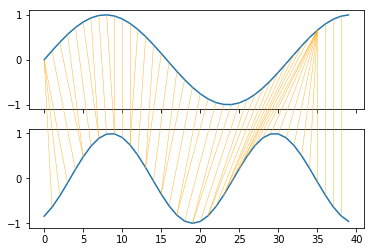

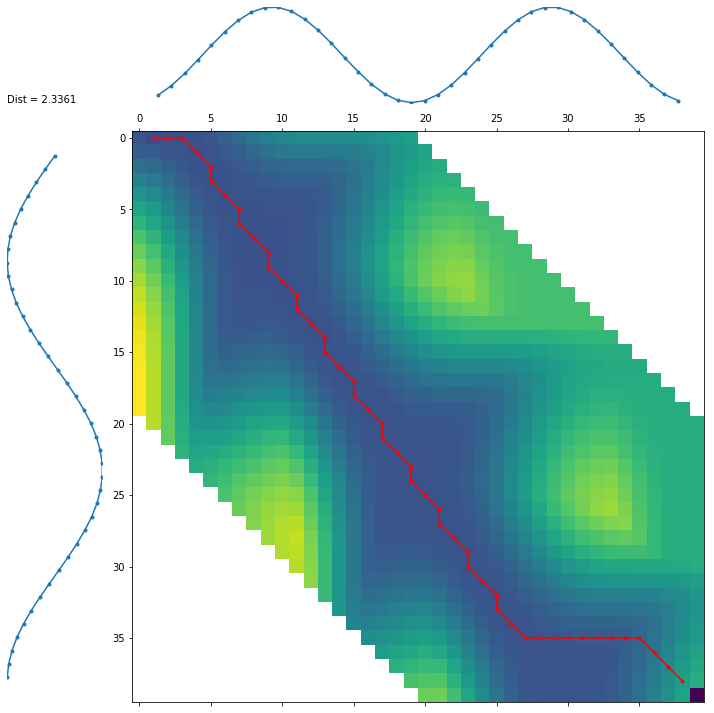

In [39]:
s1 = np.sin(0.4*x)
s2 = np.sin(0.6*x - 1)
d, paths = dtw.warping_paths(s1, s2, window=20, psi=1)
best_path = dtw.best_path(paths)
dtwvis.plot_warping(s1, s2, best_path)
distance = dtw.distance(s1, s2)
print(distance)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

In [45]:
from dtaidistance import dtw
import numpy as np
series = [
    np.array([0, 0, 1, 2, 1, 0, 1, 0, 0], dtype=np.double),
    np.array([0.0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]),
    np.array([0.0, 0, 1, 2, 1, 0, 0, 0])]
ds = dtw.distance_matrix(series)
print(ds)
distance = dtw.distance(series[0],series[1])
print(distance)
distance = dtw.distance(series[1],series[2])
print(distance)

[[       inf 1.41421356 1.        ]
 [       inf        inf 1.        ]
 [       inf        inf        inf]]
1.4142135623730951
1.0


In [17]:
from dtaidistance import dtw
import numpy as np
series = np.array([
    [0.0, 0, 1, 2, 1, 0, 1, 0, 0],
    [0.0, 1, 2, 0, 0, 0, 0, 0, 0],
    [0.0, 0, 1, 2, 1, 0, 0, 0, 0]])
ds = dtw.distance_matrix(series)
print(ds)

[[       inf 1.41421356 1.        ]
 [       inf        inf 1.        ]
 [       inf        inf        inf]]


In [20]:
from dtaidistance import dtw
import numpy as np
series = np.array([
     [0., 0, 1, 2, 1, 0, 1, 0, 0],
     [0., 1, 2, 0, 0, 0, 0, 0, 0],
     [1., 2, 0, 0, 0, 0, 0, 1, 1],
     [0., 0, 1, 2, 1, 0, 1, 0, 0],
     [0., 1, 2, 0, 0, 0, 0, 0, 0],
     [1., 2, 0, 0, 0, 0, 0, 1, 1]])
ds = dtw.distance_matrix(series, block=((1, 4), (3, 5)))
print(ds)

[[       inf        inf        inf        inf        inf        inf]
 [       inf        inf        inf 1.41421356 0.                inf]
 [       inf        inf        inf 2.23606798 1.73205081        inf]
 [       inf        inf        inf        inf 1.41421356        inf]
 [       inf        inf        inf        inf        inf        inf]
 [       inf        inf        inf        inf        inf        inf]]
